# Emissões Globais.
Informações sobre as emissões de gás metano de várias fontes.

## Sobre o conjunto de dados
### Contexto
O metano é responsável por cerca de 30% do aumento das temperaturas globais desde a Revolução Industrial, e reduções rápidas e sustentadas nas emissões de metano são fundamentais para limitar o aquecimento global a curto prazo e melhorar a qualidade do ar. O setor de energia – incluindo petróleo, gás natural, carvão e bioenergia – é responsável por quase 40% das emissões de metano da atividade humana.

### Conteúdo
O conjunto de dados a seguir tem informações sobre as emissões de gás metano globalmente. Os detalhes sobre as colunas são os seguintes:

   - região-
   - país - País de Emissão.
   - emissões - Emissões de metano em kt.
   - tipo - Setor a partir do qual as emissões ocorrem.
   - Segmento- Subsetor a partir do qual as emissões ocorrem.
   - razão - A razão da emissão.
   - baseYear - Ano base para o rastreamento de emissões.
   - notes - A fonte de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'DtScience\Methane_final.csv')
df

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...,...
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...
1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     1548 non-null   object 
 1   country    1548 non-null   object 
 2   emissions  1548 non-null   float64
 3   type       1548 non-null   object 
 4   segment    1548 non-null   object 
 5   reason     1548 non-null   object 
 6   baseYear   1548 non-null   object 
 7   notes      1548 non-null   object 
dtypes: float64(1), object(7)
memory usage: 96.9+ KB


In [5]:
# Agrupamento por coluna 'tipo' para calcular as emissões totais para cada tipo
emissão_por_tipo = df.groupby('type')['emissions'].sum()

display(emissão_por_tipo)

type
Agriculture    292758.868769
Energy         537396.311526
Other           19766.646886
Waste          145838.417946
Name: emissions, dtype: float64

In [6]:
# Classificando valores
emission_by_type_sorted = emissão_por_tipo.sort_values(ascending=False)

display(emission_by_type_sorted)

type
Energy         537396.311526
Agriculture    292758.868769
Waste          145838.417946
Other           19766.646886
Name: emissions, dtype: float64

In [7]:
display(emission_by_type_sorted.index)

Index(['Energy', 'Agriculture', 'Waste', 'Other'], dtype='object', name='type')

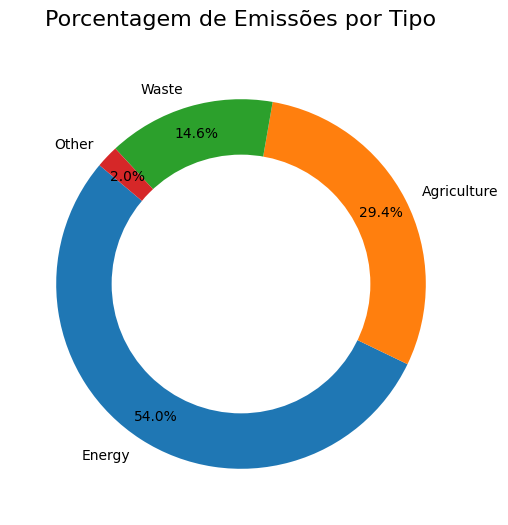

In [8]:
# Traçando gráfico de pizza para diferentes tipos de emissões
plt.figure(figsize=(8, 6))
plt.pie(emission_by_type_sorted, labels=emission_by_type_sorted.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85) 

# Adicione um buraco de rosquinha no centro do gráfico de pizza
plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white')) 

# Adicionando o título
plt.title('Porcentagem de Emissões por Tipo', fontsize=16, pad=20)

# Show the plot
plt.show()

In [9]:
# Calcule a frequência (contagem) de cada tipo de emissão
tipo_de_frequência= df['type'].value_counts()
display(tipo_de_frequência)

type
Energy         1233
Agriculture     105
Other           105
Waste           105
Name: count, dtype: int64

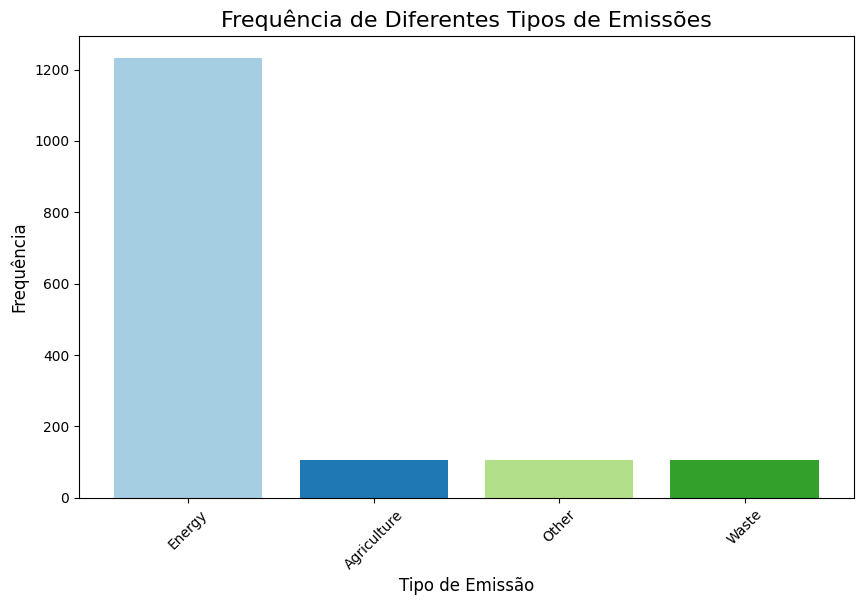

In [10]:
# Plotar gráfico de barras para frequência de cada tipo
plt.figure(figsize=(10, 6))
plt.bar(tipo_de_frequência.index, tipo_de_frequência.values, color=plt.cm.Paired(range(len(tipo_de_frequência))))
plt.xlabel('Tipo de Emissão', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Frequência de Diferentes Tipos de Emissões', fontsize=16)
plt.xticks(rotation=45)

# Mostra o gráfico
plt.show()

In [11]:
# Calcule a frequência (contagem) de cada segmento de emissão
segment_frequency = df['segment'].value_counts()
display(segment_frequency)

segment
Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: count, dtype: int64

In [12]:
display(segment_frequency.index)
display(segment_frequency.values)

Index(['Total', 'Onshore oil', 'Gas pipelines and LNG facilities',
       'Offshore oil', 'Onshore gas', 'Offshore gas', 'Other from oil and gas',
       'Bioenergy', 'Other from coal', 'Steam coal', 'Coking coal',
       'Satellite-detected large oil and gas emissions'],
      dtype='object', name='segment')

array([414, 217, 164, 159, 144, 118,  98,  93,  66,  30,  24,  21],
      dtype=int64)

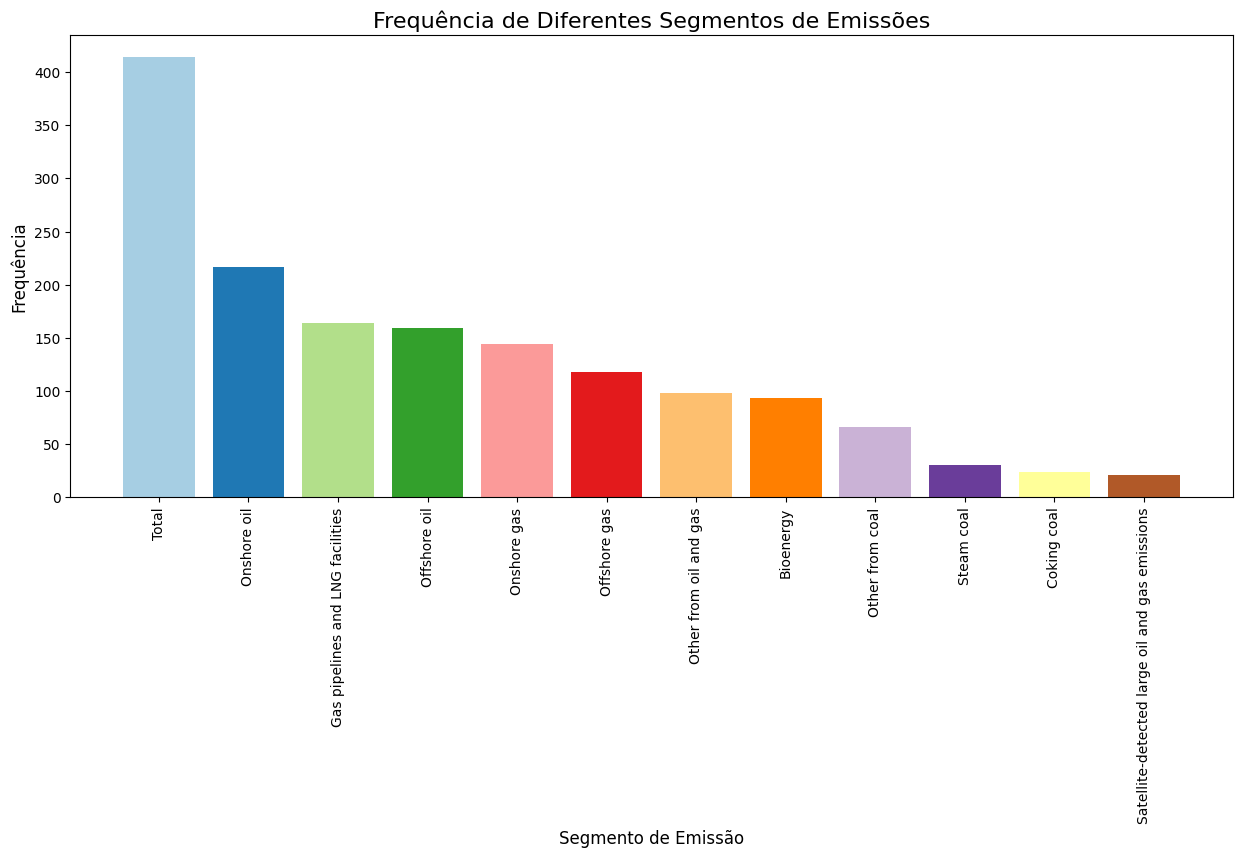

In [13]:
# Plotar gráfico de barras para a frequência de cada segmento
plt.figure(figsize=(15, 6))
plt.bar(segment_frequency.index, segment_frequency.values, color=plt.cm.Paired(range(len(segment_frequency))))
plt.xlabel('Segmento de Emissão', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Frequência de Diferentes Segmentos de Emissões', fontsize=16)
plt.xticks(rotation=90)

# Show the plot
plt.show()

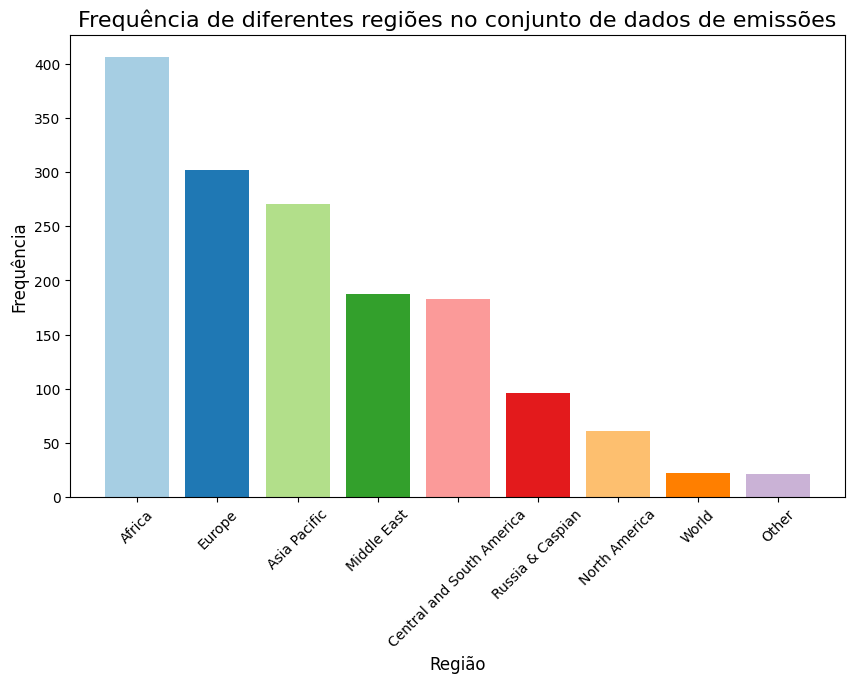

In [14]:
# Calcule a frequência (contagem) de cada região no conjunto de dados de emissão
region_frequency = df['region'].value_counts()

# Plotar gráfico de barras para a frequência de cada região
plt.figure(figsize=(10, 6))
plt.bar(region_frequency.index, region_frequency.values, color=plt.cm.Paired(range(len(region_frequency))))
plt.xlabel('Região', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Frequência de diferentes regiões no conjunto de dados de emissões', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [15]:
df.head(3)

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available


In [16]:
# Filtre os segmentos com 'Total' e agrupe os dados por 'segmento' e 'motivo', depois some as emissões de cada grupo
seg_reason_emissions = df[df['segment'] != 'Total'].groupby(['segment', 'reason'])['emissions'].sum().unstack()
display(seg_reason_emissions)

reason,All,Flared,Fugitive,Vented
segment,,,,
Bioenergy,19134.448077,NaN,NaN,NaN
Coking coal,20323.058074,NaN,NaN,NaN
Gas pipelines and LNG facilities,NaN,NaN,16045.283727,8555.360117
Offshore gas,NaN,NaN,2740.191121,5945.645597
Offshore oil,NaN,2613.990598,973.650470,13191.108671
Onshore gas,NaN,NaN,11374.466502,24680.200895
Onshore oil,NaN,12757.423631,3836.055079,51971.264491
Other from coal,3217.824070,NaN,NaN,NaN
Other from oil and gas,4785.509486,NaN,NaN,NaN


<Figure size 1500x600 with 0 Axes>

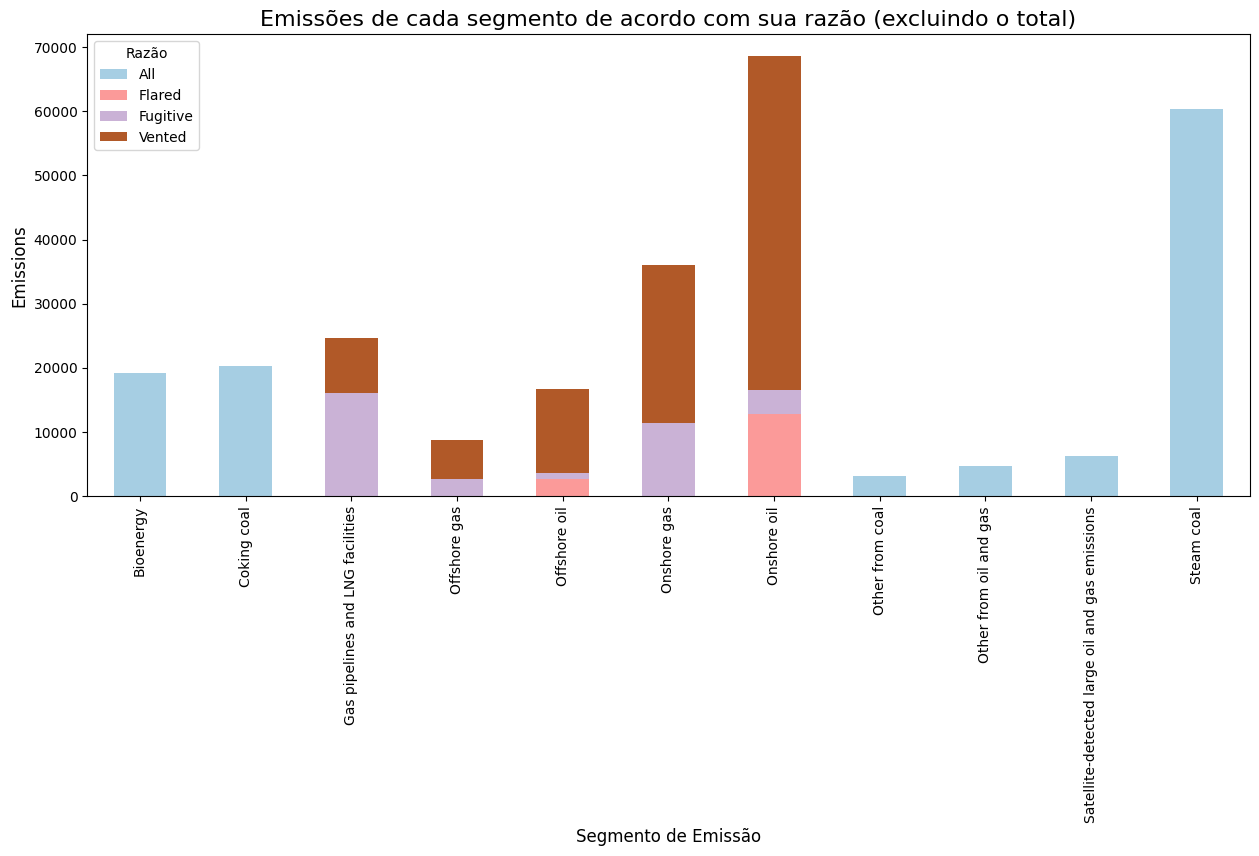

In [17]:
# Traçar gráfico de barras empilhadas para emissões de cada segmento de acordo com seu motivo
plt.figure(figsize=(15, 6))
seg_reason_emissions.plot(kind='bar', stacked=True, colormap='Paired', figsize=(15, 6))
plt.xlabel('Segmento de Emissão', fontsize=12)
plt.ylabel('Emissions', fontsize=12)
plt.title('Emissões de cada segmento de acordo com sua razão (excluindo o total)', fontsize=16)
plt.xticks(rotation=90)
plt.legend(title="Razão")

# Show the plot
plt.show()

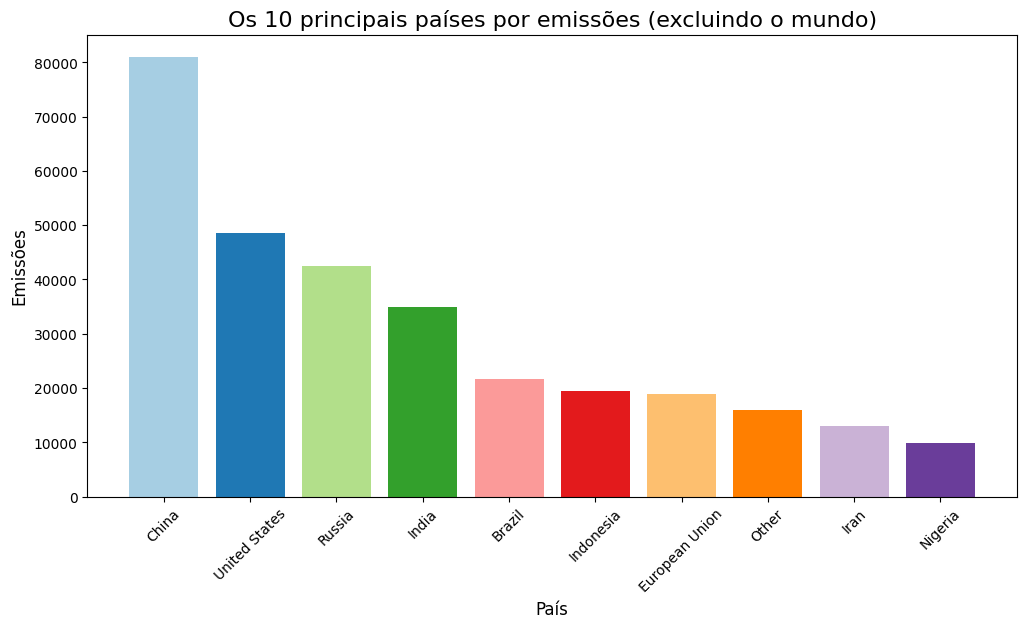

In [18]:
# Exclua as linhas em que o país é 'Mundo', agrupe os dados por 'país' e some as emissões de cada país
country_emissions = df[df['country'] != 'World'].groupby('country')['emissions'].sum()

# Classifique as emissões do país em ordem decrescente e obtenha as 10 principais
top10_country_emissions = country_emissions.sort_values(ascending=False).head(10)

# Plotar gráfico de barras para as 10 principais emissões do país
plt.figure(figsize=(12, 6))
plt.bar(top10_country_emissions.index, top10_country_emissions.values, color=plt.cm.Paired(range(len(top10_country_emissions))))
plt.xlabel('País', fontsize=12)
plt.ylabel('Emissões', fontsize=12)
plt.title('Os 10 principais países por emissões (excluindo o mundo)', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [19]:
# Exclua as linhas em que o país é 'Mundo', agrupe os dados por 'baseYear' e some as emissões de cada ano
year_emissions = df[df['country'] != 'World'].groupby('baseYear')['emissions'].sum()

# Classifique as emissões do ano em ordem decrescente e obtenha as 10 principais
top10_year_emissions = year_emissions.sort_values(ascending=False).head(10)
display(year_emissions)
display(top10_year_emissions)

baseYear
2019-2021    235913.583015
2022         270694.345156
Name: emissions, dtype: float64

baseYear
2022         270694.345156
2019-2021    235913.583015
Name: emissions, dtype: float64

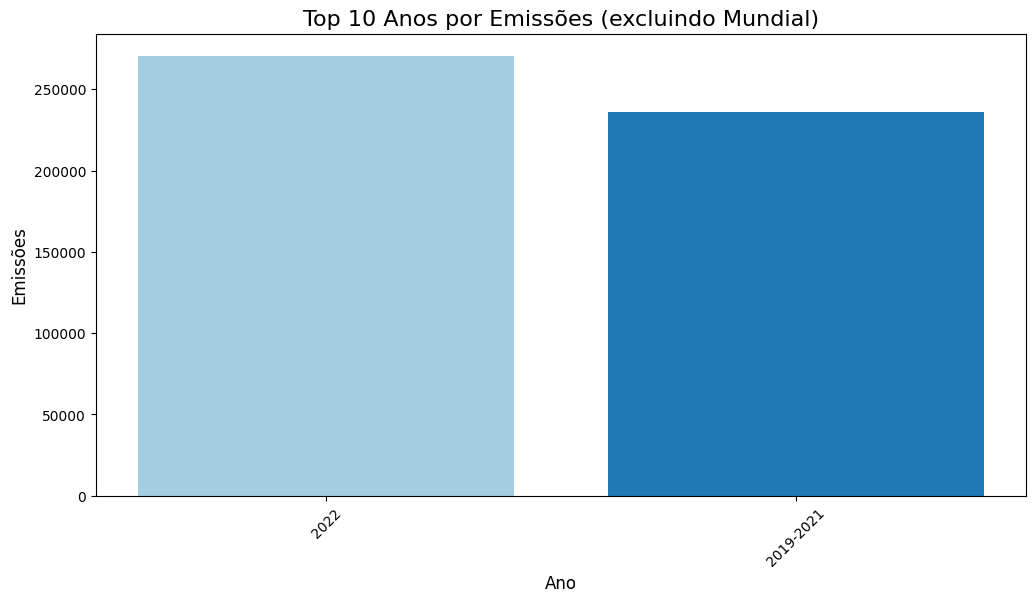

In [20]:
# Plotar gráfico de barras para as principais emissões dos 10 anos
plt.figure(figsize=(12, 6))
plt.bar(top10_year_emissions.index, top10_year_emissions.values, color=plt.cm.Paired(range(len(top10_year_emissions))))
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões', fontsize=12)
plt.title('Top 10 Anos por Emissões (excluindo Mundial)', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.show()